In [46]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data

from sklearn.model_selection import train_test_split


In [47]:
# Load the MNIST data
(x_trainval, y_trainval), (x_test, y_test) = load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

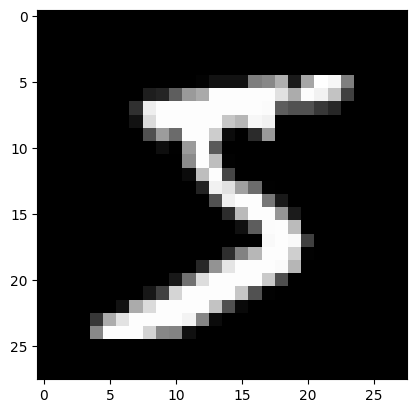

In [48]:
# Display sample data
print(x_trainval[0])
plt.imshow(x_trainval[0], cmap='gray')

In [49]:
# Show the shape of the data to verify the size of the provided partitions
print(f'{x_trainval.shape} {x_test.shape}')

(60000, 28, 28) (10000, 28, 28)


In [50]:
# Split training data into training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=10000, stratify=y_trainval)
print(f'{x_train.shape} {x_val.shape}')


(50000, 28, 28) (10000, 28, 28)


In [51]:
y_train[0]

np.uint8(4)

In [52]:
# Normalize the data
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Add extra dimension for channels
x_train = x_train[..., tf.newaxis]
x_val = x_val[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert to 32 bit floating point
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [53]:
nn1 = Sequential()
nn1.add(Input(shape=(28,28,1)))
nn1.add(Flatten())
nn1.add(Dense(380))
nn1.add(Dense(10, activation='softmax'))

nn1.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy'])

In [58]:
nn1.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9248 - loss: 0.2637 - val_accuracy: 0.9160 - val_loss: 0.3144
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9266 - loss: 0.2631 - val_accuracy: 0.9172 - val_loss: 0.3070
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9261 - loss: 0.2601 - val_accuracy: 0.9141 - val_loss: 0.3215
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9268 - loss: 0.2593 - val_accuracy: 0.9182 - val_loss: 0.3060
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9280 - loss: 0.2574 - val_accuracy: 0.9142 - val_loss: 0.3170
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9272 - loss: 0.2556 - val_accuracy: 0.9170 - val_loss: 0.3097
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9286 - loss: 0.2552 - val_accuracy: 0.9169 - val_loss: 0.3086
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9261 - loss: 0.2558 - 

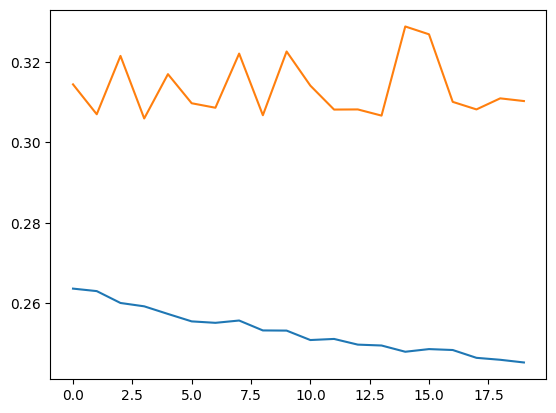

In [ ]:
plt.plot(nn1.history.history['loss'], name='loss')
plt.plot(nn1.history.history['val_loss'])
plt.show()